<a href="https://colab.research.google.com/github/mrneerajnegi/Data-Science/blob/loan_prediction_svm/loan_status_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sbn
from sklearn.preprocessing  import LabelEncoder

In [19]:
data_set=pd.read_csv("./loan_status.csv")
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data_set.shape

(614, 13)

In [7]:
data_set.isnull().sum()
data_set.dropna(inplace=True)
data_set.shape


(480, 13)

In [8]:
data_set["Loan_Status"]=data_set["Loan_Status"].apply(lambda x :1 if x=="Y" else 0)

In [9]:
data_set.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [10]:
data_set.replace({"Loan_Status":{0:"N",1:"Y"}},inplace=True)

In [11]:
data_set["Loan_Status"]=data_set["Loan_Status"].apply(lambda x :1 if x=="Y" else 0)
data_set.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


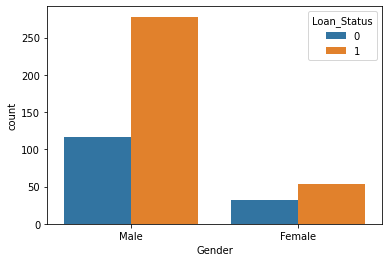

In [12]:
sbn.countplot(x="Gender",hue="Loan_Status",data=data_set)

In [13]:
encoder=LabelEncoder()
data_set["Gender"]=encoder.fit_transform(data_set["Gender"])
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [14]:
data_set.replace({"Dependents":{"3+":4}},inplace=True)
dummies=pd.get_dummies(data_set.drop(columns=["Loan_ID","Loan_Status"],axis=1),drop_first=True)
X=dummies
Y=data_set["Loan_Status"]

In [15]:
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.2)
model=SVC()
model.fit(trainx,trainy)
model.score(testx,testy)

0.71875

In [16]:
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,